# How to Read and Plot NetCDF MERRA-2 Data in Python

***

### Date Authored: 6/6/2023

### Overview:
This How-To shows how to read and plot NetCDF4 data from the Modern-Era Retrospective analysis for Research and Applications version 2 (MERRA-2) using Python.

### Example:
**Example data:** MERRA-2 Monthly 0.5 x 0.625 degree 2 meter air temperature (M2TMNXSLV_V5.12.4) for January 2010.

**Example image:**

<img src="https://disc.gsfc.nasa.gov/media/image/1a640422eade4e1db30cc96ec37083ae/MERRA2_t2m.png" title="Image1"/>

**Estimated Time to complete the following procedures:** 20 minutes

### Prerequisites:

This notebook was written using Python 3.9, and requires these libraries and files: 

- [numpy](http://www.numpy.org/)
- [netCDF4](http://unidata.github.io/netcdf4-python/)
- [matplotlib](http://matplotlib.org/)
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/)
- Example Data: https://data.gesdisc.earthdata.nasa.gov/data/MERRA2_MONTHLY/M2TMNXSLV.5.12.4/2010/MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
  - Please see [Data Access](https://disc.gsfc.nasa.gov/information/documents?title=Data%20Access) for help in downloading the data file.

The first step is to import the required Python libraries. They are used to read and plot the data. If any of the following import commands fail, check the local Python environment and install any missing packages. 

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Open the NetCDF4 file (add a directory path if necessary) for reading:

In [2]:
data = Dataset('MERRA2_300.tavgM_2d_slv_Nx.201001.nc4', mode='r')

Run the following line below to print MERRA2 metadata. This line will print attribute and variable information. From the 'variables(dimensions)' list, choose which variable(s) to read in below.

In [3]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    Filename: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    Comment: GMAO filename: d5124_m2_jan00.tavg1_2d_slv_Nx.monthly.201001.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXSLV
    RangeBeginningDate: 2010-01-01
    RangeEndingDate: 2010-01-31
    GranuleID: MERRA2_300.tavgM_2d_slv_Nx.201001.nc4
    ProductionDateTime: Original file generated: Fri Jul  3 02:53:08 2015 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics Monthly Mean
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,S

Read in 'T2M' 2-meter air temperature variable:

In [4]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
lon, lat = np.meshgrid(lons, lats)
T2M = data.variables['T2M'][:,:,:]

If using MERRA-2 data with multiple time indices in the file, the following line will extract only the first time index.  
_Note: Changing T2M\[0,:,:\] to T2M\[10,:,:\] will subset the 11th time index instead of the first._

In [5]:
T2M = T2M[0,:,:]

### Start Plotting Data 

Plot the data using matplotlib and cartopy

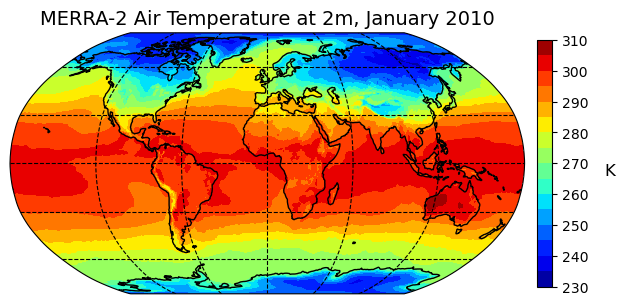

In [6]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,zorder=5)
ax.gridlines(linestyle='--',color='black')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, January 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [7]:
# Save the figure as a PNG image
fig.savefig('MERRA2_t2m.png', format='png', dpi=100)

<font size="1">THE SUBJECT FILE IS PROVIDED "AS IS" WITHOUT ANY WARRANTY OF ANY KIND, EITHER EXPRESSED, IMPLIED, OR STATUTORY, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTY THAT THE SUBJECT FILE WILL CONFORM TO SPECIFICATIONS, ANY IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR FREEDOM FROM INFRINGEMENT, ANY WARRANTY THAT THE SUBJECT FILE WILL BE ERROR FREE, OR ANY WARRANTY THAT DOCUMENTATION, IF PROVIDED, WILL CONFORM TO THE SUBJECT FILE. THIS AGREEMENT DOES NOT, IN ANY MANNER, CONSTITUTE AN ENDORSEMENT BY GOVERNMENT AGENCY OR ANY PRIOR RECIPIENT OF ANY RESULTS, RESULTING DESIGNS, HARDWARE, SOFTWARE PRODUCTS OR ANY OTHER APPLICATIONS RESULTING FROM USE OF THE SUBJECT FILE. FURTHER, GOVERNMENT AGENCY DISCLAIMS ALL WARRANTIES AND LIABILITIES REGARDING THIRD-PARTY SOFTWARE, IF PRESENT IN THE SUBJECT FILE, AND DISTRIBUTES IT "AS IS."